In [ ]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [ ]:
#Fetch Images count from Fodlers
count = 0
dirs = os.listdir('/content/drive/MyDrive/train')
for dir in dirs:
    files = list(os.listdir('/content/drive/MyDrive/train'))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

rose Folder has 5 Images
daisy Folder has 5 Images
tulip Folder has 5 Images
dandelion Folder has 5 Images
sunflower Folder has 5 Images
Images Folder has 25 Images


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/Images'
classes = os.listdir(dataset_path)

In [ ]:
#Load Images into Arrays as Dataset
base_dir = '/content/drive/MyDrive/train'
img_size = 180
batch = 55

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

all_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    batch_size=batch,
    image_size=(img_size, img_size)
)

image_data = list(all_ds.unbatch())
images, labels = zip(*image_data)

# Conversion en tableaux NumPy
images = np.array([img.numpy() for img in images])
labels = np.array([lbl.numpy() for lbl in labels])

# Division explicite des données en entraînement et validation
train_images, val_images, train_labels, val_labels = train_test_split(
    images, labels, test_size=0.3, random_state=123
)

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch)
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch)

# Chargement des données de test
test_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.15,
    subset='validation',
    batch_size=batch,
    image_size=(img_size, img_size)
)


Found 2746 files belonging to 5 classes.
Found 2746 files belonging to 5 classes.
Using 411 files for validation.


In [ ]:
# Chargement complet des données sans mise en lot
all_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    batch_size=batch,
    image_size=(img_size, img_size)
)

# Accéder aux noms des classes
flower_names = all_ds.class_names
print(flower_names)


Found 2746 files belonging to 5 classes.
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers le répertoire contenant les données d'entraînement
data_train = '/content/drive/MyDrive/train'

# Récupérer les noms des classes
class_names = os.listdir(data_train)

# Initialiser la figure avec des sous-graphiques
fig, axs = plt.subplots(len(class_names), 3, figsize=(15, len(class_names) * 5), constrained_layout=True)

# Boucle à travers les classes et les images
for i, cls in enumerate(class_names):
    cls_dir = os.path.join(data_train, cls)
    image_files = os.listdir(cls_dir)[:3]  # Prendre les 3 premières images de chaque classe

    for j, img_name in enumerate(image_files):
        img_path = os.path.join(cls_dir, img_name)
        img = Image.open(img_path)

        # Afficher l'image
        axs[i, j].imshow(img)
        axs[i, j].axis('off')  # Masquer les axes
        axs[i, j].set_title(cls)  # Titre de la classe

# Afficher toutes les images
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
# Normalisation des images
def process_image(image, label):
    image = tf.image.resize(image, [img_size, img_size])
    image /= 255.0  # Normalisation
    return image, label

train_ds = train_ds.map(process_image, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_image, num_parallel_calls=AUTOTUNE)

# Comptage des fichiers dans les ensembles
train_size = sum(1 for _ in train_ds)
val_size = sum(1 for _ in val_ds)


# Vérification des tailles des ensembles
print(f"Nombre de fichiers d'entraînement : {len(train_ds) * batch}")
print(f"Nombre de fichiers de validation : {len(val_ds) * batch}")



Nombre de fichiers d'entraînement : 1925
Nombre de fichiers de validation : 825


In [ ]:
# Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

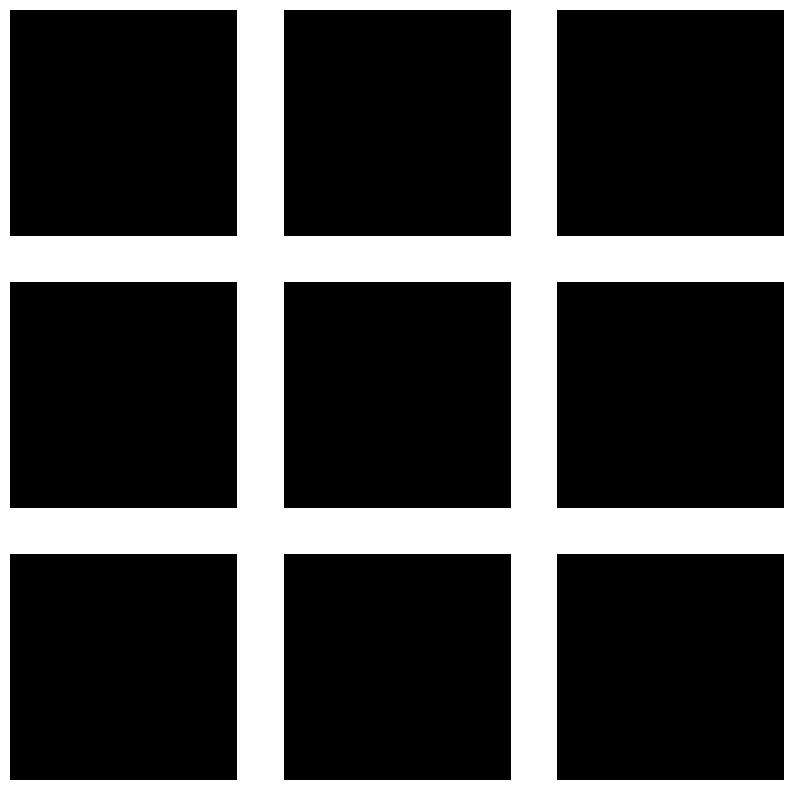

Valeurs de la première image :
[[[0.05098039 0.05098039 0.05098039]
  [0.05542484 0.05542484 0.05542484]
  [0.06100218 0.06100218 0.06100218]
  ...
  [0.11764706 0.16862746 0.10087149]
  [0.12104576 0.17202616 0.10535949]
  [0.1254902  0.1764706  0.10980392]]

 [[0.05098039 0.05098039 0.05098039]
  [0.05542484 0.05542484 0.05542484]
  [0.06100218 0.06100218 0.06100218]
  ...
  [0.10270877 0.15368916 0.0859332 ]
  [0.1054902  0.1564706  0.08980393]
  [0.10993464 0.16091503 0.09424836]]

 [[0.05098039 0.05098039 0.05098039]
  [0.05542484 0.05542484 0.05542484]
  [0.06100218 0.06100218 0.06100218]
  ...
  [0.08553617 0.13494308 0.06718711]
  [0.08909224 0.13789397 0.07122732]
  [0.09477124 0.14357299 0.07690632]]

 ...

 [[0.79041344 0.66318023 0.68954194]
  [0.80831504 0.68997073 0.7125053 ]
  [0.85964656 0.7604453  0.78005314]
  ...
  [0.07843138 0.06479064 0.04003889]
  [0.08155403 0.07100943 0.04984026]
  [0.08278856 0.0766884  0.05490196]]

 [[0.7635294  0.63411766 0.66156864]
  [0.8

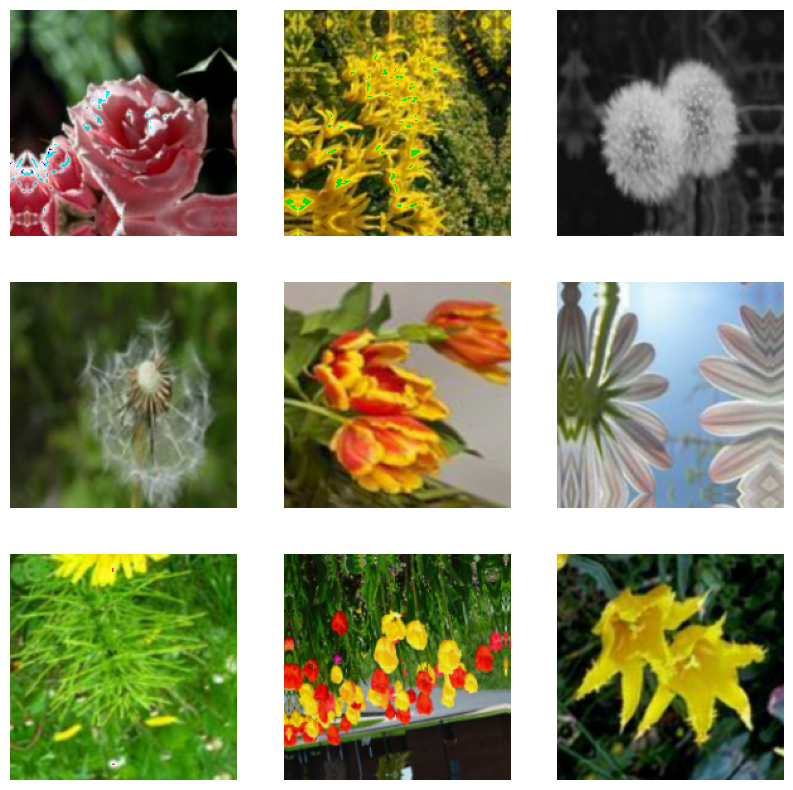

In [ ]:
import matplotlib.pyplot as plt

# Afficher les premières images du dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Afficher l'image originale
        plt.axis('off')
plt.show()

# Vérifier les valeurs des pixels
for images, labels in train_ds.take(1):
    print("Valeurs de la première image :")
    print(images[0].numpy())  # Afficher les valeurs de la première image

# Affichage des images augmentées
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        # Appliquer la data augmentation
        augmented_image = data_augmentation(images, training=True)

        # Afficher l'image augmentée
        plt.subplot(3, 3, i + 1)
        plt.imshow((augmented_image[i].numpy() * 255).astype('uint8'))  # Ajustement pour l'affichage
        plt.axis('off')

# Afficher toutes les images augmentées
plt.show()


In [ ]:
from tensorflow.keras import Sequential, layers, regularizers

model = Sequential([

    layers.Input(shape=(img_size, img_size, 3)),

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional block
    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fifth convolutional block
    layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Dropout for additional regularization
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(5, activation='softmax')  # Output layer
])

# Compiler le modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Résumé du modèle
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 87, 87, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,783,429 (10.62 MB)

 Trainable params: 2,782,725 (10.62 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)


Epoch 1/32
35/35 ━━━━━━━━━━━━━━━━━━━━ 292s 8s/step - accuracy: 0.3078 - loss: 15.2538 - val_accuracy: 0.2306 - val_loss: 12.4219
Epoch 2/32
35/35 ━━━━━━━━━━━━━━━━━━━━ 316s 8s/step - accuracy: 0.4914 - loss: 10.5316 - val_accuracy: 0.2306 - val_loss: 11.0190
Epoch 3/32
35/35 ━━━━━━━━━━━━━━━━━━━━ 320s 8s/step - accuracy: 0.5503 - loss: 7.6478 - val_accuracy: 0.2306 - val_loss: 7.2500
Epoch 4/32
35/35 ━━━━━━━━━━━━━━━━━━━━ 296s 8s/step - accuracy: 0.5744 - loss: 5.6460 - val_accuracy: 0.2306 - val_loss: 6.3517
Epoch 5/32
35/35 ━━━━━━━━━━━━━━━━━━━━ 303s 8s/step - accuracy: 0.5772 - loss: 4.3928 - val_accuracy: 0.2306 - val_loss: 5.8654
Epoch 6/32
35/35 ━━━━━━━━━━━━━━━━━━━━ 324s 8s/step - accuracy: 0.6133 - loss: 3.4905 - val_accuracy: 0.2306 - val_loss: 5.6807
Epoch 7/32
35/35 ━━━━━━━━━━━━━━━━━━━━ 278s 8s/step - accuracy: 0.6217 - loss: 2.8835 - val_accuracy: 0.2306 - val_loss: 4.4983
Epoch 8/32
35/35 ━━━━━━━━━━━━━━━━━━━━ 278s 8s/step - accuracy: 0.6406 - loss: 2.4508 - val_accuracy: 0.2306

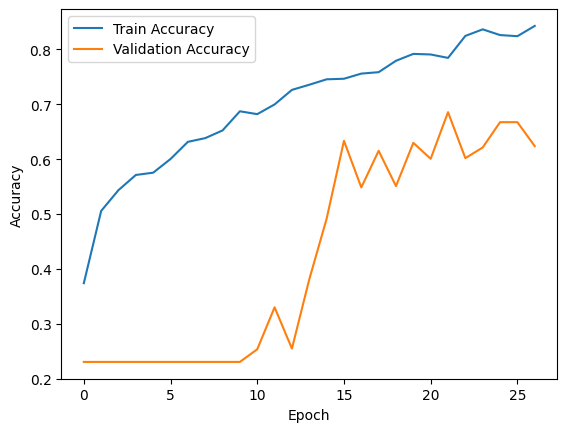

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_ds,
                    epochs=32,
                    validation_data=val_ds,
                    callbacks=[early_stopping])



# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image) / 255.0
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])

    class_index = np.argmax(result)
    class_probability = result[class_index] * 100

    print("Probabilités de toutes les classes :")
    for i, prob in enumerate(result):
        print(f"{flower_names[i]}: {prob * 100:.2f}%")

    outcome = f"The Image belongs to {flower_names[np.argmax(result)]} with a probability of {class_probability:.2f}% "
    return outcome

In [ ]:
classify_images('/content/drive/MyDrive/Sample/sunflower.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Probabilités de toutes les classes :
daisy: 15.77%
dandelion: 18.29%
rose: 15.86%
sunflower: 33.92%
tulip: 16.16%


'The Image belongs to sunflower with a probability of 33.92% '

In [ ]:
import tensorflow as tf

# Convertir le modèle en TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Sauvegarder le modèle
with open("flower_classifier.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpdmn9geuj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139568929005712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568929010640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568927131248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568929012928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568929013280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568927130544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568927134944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568927133008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568927133360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568927134768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139568927134

# Nouvelle section